In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import sklearn as sklearn

df = pd.read_csv('Salary_Data.csv')   # or the URL you’re using

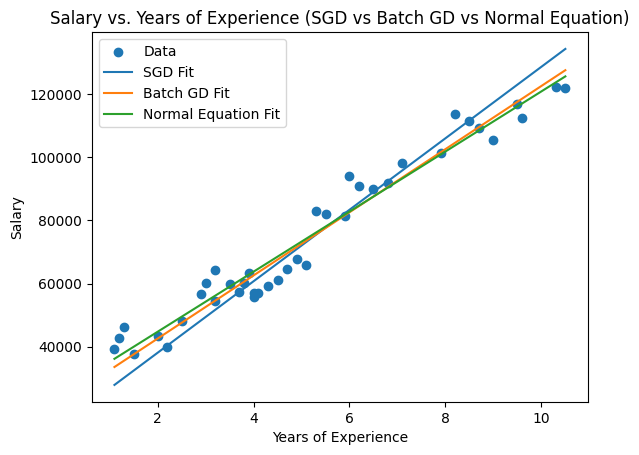

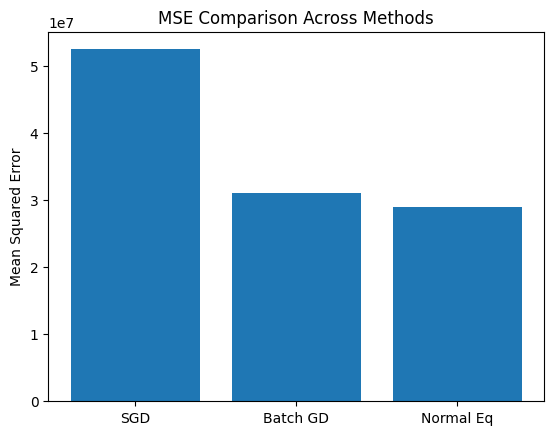

In [56]:
x = df['Experience Years'].values
y = df['Salary'].values
m = len(y)
X_b = np.c_[np.ones((m, 1)), x]# add x0 = 1 to each instance
alpha = 0.01

#Batch Gradient Descent
n_iterations = 1000
theta_batch = np.zeros(2)
for iteration in range(n_iterations):
    gradients = X_b.T.dot(X_b.dot(theta_batch) - y) / m
    theta_batch = theta_batch - alpha * gradients

# Stochastic Gradient Descent
theta_sgd = np.zeros(2)
for i in range(10):
    indices = np.random.permutation(len(x))
    for j in indices:
        xi = X_b[j:j+1]
        yi = y[j]
        error = xi.dot(theta_sgd) - yi
        gradients = xi.T * error
        theta_sgd = theta_sgd - alpha * gradients.flatten()

# The normal equation
theta_normal = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)


plot.figure()
plot.scatter(x, y, label='Data')
plot.plot(x, theta_sgd[0] + theta_sgd[1] * x, label='SGD Fit')
plot.plot(x, theta_batch[0] + theta_batch[1] * x, label='Batch GD Fit')
plot.plot(x, theta_normal[0] + theta_normal[1] * x, label='Normal Equation Fit')
plot.xlabel('Years of Experience')
plot.ylabel('Salary')
plot.title('Salary vs. Years of Experience (SGD vs Batch GD vs Normal Equation)')
plot.legend()
plot.show()

mse_batch  = np.mean((X_b.dot(theta_batch)  - y)**2)
mse_sgd    = np.mean((X_b.dot(theta_sgd)    - y)**2)
mse_normal = np.mean((X_b.dot(theta_normal) - y)**2)

# Plot MSE comparison
plot.figure()
methods = ['SGD', 'Batch GD', 'Normal Eq']
mses    = [mse_sgd, mse_batch, mse_normal]
plot.bar(methods, mses)
plot.ylabel('Mean Squared Error')
plot.title('MSE Comparison Across Methods')
plot.show()
